In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
# Loading the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train,y_train), (x_test,y_test)= fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x Train Shape:", x_train.shape)


4423680/4422102 [==============================] - 0s 0us/step
x Train Shape: (60000, 28, 28)


In [5]:
# the data is only 2d
# convolution expects height x width x color
x_train= np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
#number of classes
K= len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [7]:
#Build the model using the functional API
i=Input(shape=x_train[0].shape)

x=Conv2D(32, (3,3), strides=2,activation= 'relu')(i)

x=Conv2D(64,(3,3), strides=2,activation= 'relu')(x)
x=Conv2D(128,(3,3), strides=2,activation= 'relu')(x)
x=Flatten()(x)
x= Dropout(0.2)(x)
x= Dense(512, activation = 'relu')(x)
x= Dropout(0.2)(x)
x= Dense(K, activation ='softmax')(x)

model = Model(i,x)

In [8]:
# Compile and fit
# Note: make sure you are using GPU

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 13s 3ms/step - loss: 0.6889 - accuracy: 0.7486 - val_loss: 0.4084 - val_accuracy: 0.8402
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3726 - accuracy: 0.8614 - val_loss: 0.3561 - val_accuracy: 0.8680
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3168 - accuracy: 0.8824 - val_loss: 0.3130 - val_accuracy: 0.8851
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2774 - accuracy: 0.8965 - val_loss: 0.3050 - val_accuracy: 0.8876
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2493 - accuracy: 0.9064 - val_loss: 0.3144 - val_accuracy: 0.8852
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2264 - accuracy: 0.9133 - val_loss: 0.2978 - val_accuracy: 0.8920
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2048 - accuracy: 0.9210 - val_loss: 0.3062 - val_accuracy

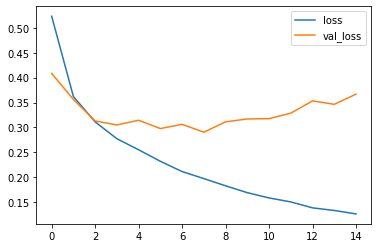

In [9]:
#plot loss per iteration

import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

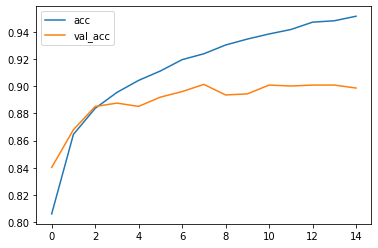

In [10]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()